In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.figsize']=12,8
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.api import VAR

In [ ]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
new = df[['dteday', 'season','mnth', 'hum','temp','windspeed','cnt']]
new.head()

,dteday,season,mnth,hum,temp,windspeed,cnt
0,01-01-2018,1,1,80.5833,14.110847,10.749882,985
1,02-01-2018,1,1,69.6087,14.902598,16.652113,801
2,03-01-2018,1,1,43.7273,8.050924,16.636703,1349
3,04-01-2018,1,1,59.0435,8.200000,10.739832,1562
4,05-01-2018,1,1,43.6957,9.305237,12.522300,1600


In [ ]:
new.tail()

,dteday,season,mnth,hum,temp,windspeed,cnt
725,27-12-2019,1,12,65.2917,10.420847,23.458911,2114
726,28-12-2019,1,12,59.0000,10.386653,10.416557,3095
727,29-12-2019,1,12,75.2917,10.386653,8.333661,1341
728,30-12-2019,1,12,48.3333,10.489153,23.500518,1796
729,31-12-2019,1,12,57.7500,8.849153,10.374682,2729


In [ ]:
new.shape

(730, 7)

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dteday     730 non-null    object 
 1   season     730 non-null    int64  
 2   mnth       730 non-null    int64  
 3   hum        730 non-null    float64
 4   temp       730 non-null    float64
 5   windspeed  730 non-null    float64
 6   cnt        730 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 40.0+ KB


In [ ]:
# parsing string to Datetime

new['dteday'] = pd.to_datetime(new['dteday'])
new['dteday'] = pd.to_datetime(new['dteday'].dt.strftime('%d-%m-%y'))
new = new.sort_values(by=['dteday'])
new.head()

,dteday,season,mnth,hum,temp,windspeed,cnt
0,2018-01-01,1,1,80.5833,14.110847,10.749882,985
1,2018-01-02,1,1,69.6087,14.902598,16.652113,801
2,2018-01-03,1,1,43.7273,8.050924,16.636703,1349
3,2018-01-04,1,1,59.0435,8.200000,10.739832,1562
4,2018-01-05,1,1,43.6957,9.305237,12.522300,1600


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dteday     730 non-null    datetime64[ns]
 1   season     730 non-null    int64         
 2   mnth       730 non-null    int64         
 3   hum        730 non-null    float64       
 4   temp       730 non-null    float64       
 5   windspeed  730 non-null    float64       
 6   cnt        730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 45.6 KB


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

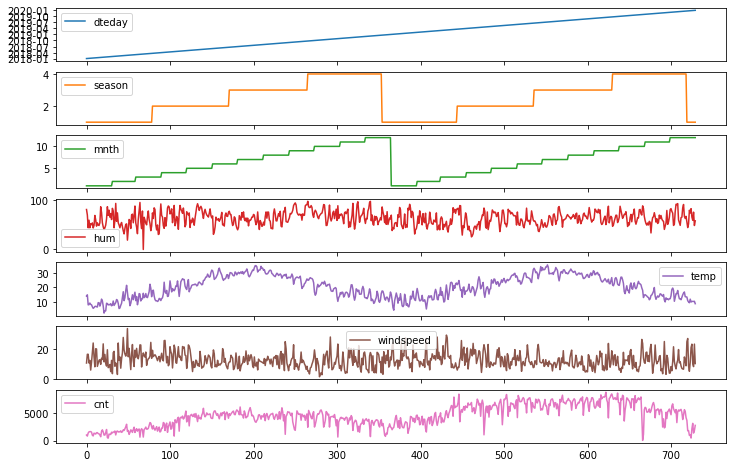

In [ ]:
new.plot(subplots=True)

In [ ]:
fig = px.line(new, x='dteday', y='cnt', hover_data=['temp'], title='B-Bikes')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
new.corr()

,season,mnth,hum,temp,windspeed,cnt
season,1.000000,0.831032,0.208220,0.333361,-0.229607,0.404584
mnth,0.831032,1.000000,0.224937,0.219083,-0.208013,0.278191
hum,0.208220,0.224937,1.000000,0.128565,-0.248506,-0.098543
temp,0.333361,0.219083,0.128565,1.000000,-0.158186,0.627044
windspeed,-0.229607,-0.208013,-0.248506,-0.158186,1.000000,-0.235132
cnt,0.404584,0.278191,-0.098543,0.627044,-0.235132,1.000000


<AxesSubplot:>

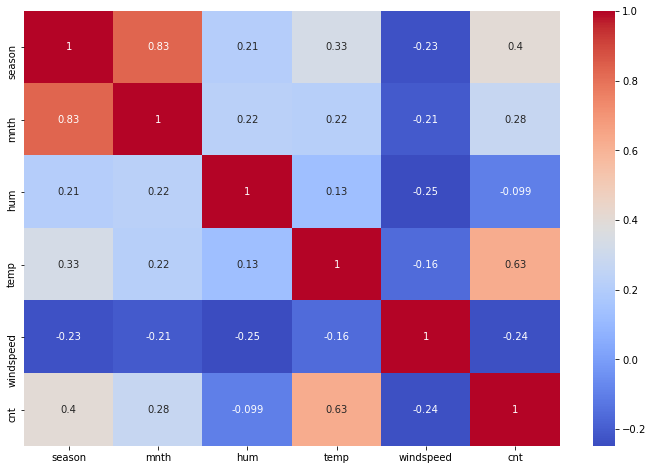

In [ ]:
sns.heatmap(new.corr(),annot = True, cmap = 'coolwarm')

In [ ]:
new = new.set_index('dteday')
new.head()

,season,mnth,hum,temp,windspeed,cnt
dteday,,,,,,
2018-01-01,1,1,80.5833,14.110847,10.749882,985
2018-01-02,1,1,69.6087,14.902598,16.652113,801
2018-01-03,1,1,43.7273,8.050924,16.636703,1349
2018-01-04,1,1,59.0435,8.200000,10.739832,1562
2018-01-05,1,1,43.6957,9.305237,12.522300,1600


array([<AxesSubplot:xlabel='dteday'>, <AxesSubplot:xlabel='dteday'>,
       <AxesSubplot:xlabel='dteday'>, <AxesSubplot:xlabel='dteday'>,
       <AxesSubplot:xlabel='dteday'>, <AxesSubplot:xlabel='dteday'>],
      dtype=object)

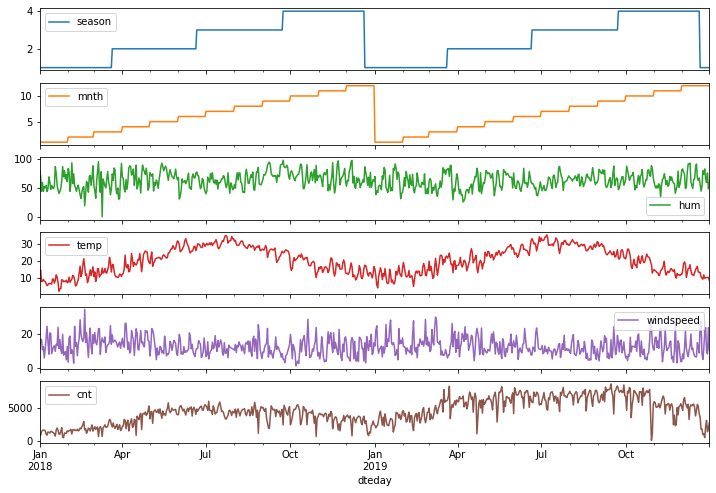

In [ ]:
new.plot(subplots=True)

<AxesSubplot:xlabel='dteday'>

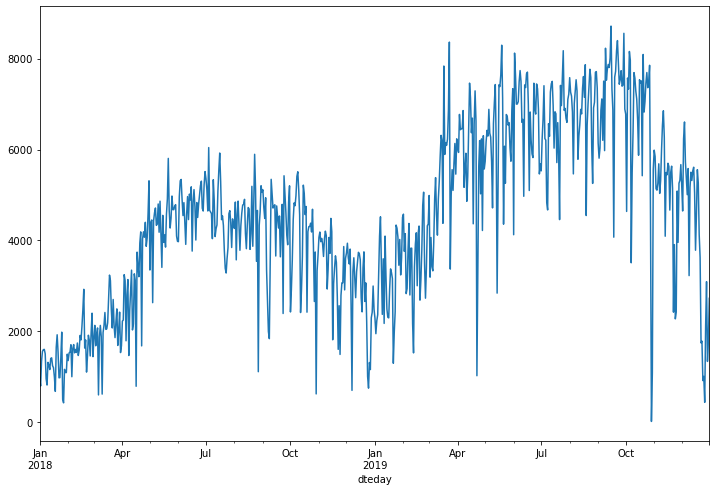

In [ ]:
new['cnt'].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, cutoff = 0.05):

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

In [ ]:
for col in new.columns:
    print('Column name:',col)
    test_stationarity(new[col])
    print('#'*50)

Column name: season
Results of Dickey-Fuller Test:
p-value = 0.2014. The series is likely non-stationary.
Test Statistic                  -2.213538
p-value                          0.201369
#Lags Used                       0.000000
Number of Observations Used    729.000000
Critical Value (1%)             -3.439352
Critical Value (5%)             -2.865513
Critical Value (10%)            -2.568886
dtype: float64
##################################################
Column name: mnth
Results of Dickey-Fuller Test:
p-value = 0.4090. The series is likely non-stationary.
Test Statistic                  -1.743174
p-value                          0.409016
#Lags Used                       0.000000
Number of Observations Used    729.000000
Critical Value (1%)             -3.439352
Critical Value (5%)             -2.865513
Critical Value (10%)            -2.568886
dtype: float64
##################################################
Column name: hum
Results of Dickey-Fuller Test:
p-value = 0.0000. The 

In [ ]:
new.columns

Index(['season', 'mnth', 'hum', 'temp', 'windspeed', 'cnt'], dtype='object')

In [ ]:
stat_dataset = new[['hum','windspeed']]
stat_dataset

,hum,windspeed
dteday,,
2018-01-01,80.5833,10.749882
2018-01-02,69.6087,16.652113
2018-01-03,43.7273,16.636703
2018-01-04,59.0435,10.739832
2018-01-05,43.6957,12.522300
...,...,...
2019-12-27,65.2917,23.458911
2019-12-28,59.0000,10.416557
2019-12-29,75.2917,8.333661


In [ ]:
stat_dataset['diff_season'] = new['season']-new['season'].shift(1)
test_stationarity(stat_dataset['diff_season'].dropna())

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                 -26.944387
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    728.000000
Critical Value (1%)             -3.439364
Critical Value (5%)             -2.865518
Critical Value (10%)            -2.568888
dtype: float64


In [ ]:
stat_dataset['diff_mnth'] = new['mnth']-new['mnth'].shift(1)
test_stationarity(stat_dataset['diff_mnth'].dropna())

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                 -26.975759
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    728.000000
Critical Value (1%)             -3.439364
Critical Value (5%)             -2.865518
Critical Value (10%)            -2.568888
dtype: float64


In [ ]:
stat_dataset['diff_temp'] = new['temp']-new['temp'].shift(1)
test_stationarity(stat_dataset['diff_temp'].dropna())

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -8.721242e+00
p-value                        3.380987e-14
#Lags Used                     1.500000e+01
Number of Observations Used    7.130000e+02
Critical Value (1%)           -3.439555e+00
Critical Value (5%)           -2.865602e+00
Critical Value (10%)          -2.568933e+00
dtype: float64


In [ ]:
stat_dataset['diff_cnt'] = new['cnt']-new['cnt'].shift(1)
test_stationarity(stat_dataset['diff_cnt'].dropna())

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.186692e+01
p-value                        6.641911e-22
#Lags Used                     1.200000e+01
Number of Observations Used    7.160000e+02
Critical Value (1%)           -3.439516e+00
Critical Value (5%)           -2.865585e+00
Critical Value (10%)          -2.568924e+00
dtype: float64


In [ ]:
stat_dataset

,hum,windspeed,diff_season,diff_mnth,diff_temp,diff_cnt
dteday,,,,,,
2018-01-01,80.5833,10.749882,NaN,NaN,NaN,NaN
2018-01-02,69.6087,16.652113,0.0,0.0,0.791751,-184.0
2018-01-03,43.7273,16.636703,0.0,0.0,-6.851674,548.0
2018-01-04,59.0435,10.739832,0.0,0.0,0.149076,213.0
2018-01-05,43.6957,12.522300,0.0,0.0,1.105237,38.0
...,...,...,...,...,...,...
2019-12-27,65.2917,23.458911,0.0,0.0,0.444194,1673.0
2019-12-28,59.0000,10.416557,0.0,0.0,-0.034194,981.0
2019-12-29,75.2917,8.333661,0.0,0.0,0.000000,-1754.0


In [ ]:
stat_dataset.dropna(inplace=True)
stat_dataset.head()

,hum,windspeed,diff_season,diff_mnth,diff_temp,diff_cnt
dteday,,,,,,
2018-01-02,69.6087,16.652113,0.0,0.0,0.791751,-184.0
2018-01-03,43.7273,16.636703,0.0,0.0,-6.851674,548.0
2018-01-04,59.0435,10.739832,0.0,0.0,0.149076,213.0
2018-01-05,43.6957,12.522300,0.0,0.0,1.105237,38.0
2018-01-06,51.8261,6.000868,0.0,0.0,-0.926969,6.0


In [ ]:
train = stat_dataset[:int(0.8*(len(stat_dataset)))]
test = stat_dataset[int(0.8*(len(stat_dataset))):]
test

,hum,windspeed,diff_season,diff_mnth,diff_temp,diff_cnt
dteday,,,,,,
2019-08-08,67.2917,7.416900,0.0,0.0,0.580847,261.0
2019-08-09,62.0417,10.458700,0.0,0.0,0.239153,-248.0
2019-08-10,71.5833,16.000471,0.0,0.0,-1.640000,-1500.0
2019-08-11,73.2917,13.834093,0.0,0.0,-0.956653,513.0
2019-08-12,53.0417,8.208304,0.0,0.0,0.341653,245.0
...,...,...,...,...,...,...
2019-12-27,65.2917,23.458911,0.0,0.0,0.444194,1673.0
2019-12-28,59.0000,10.416557,0.0,0.0,-0.034194,981.0
2019-12-29,75.2917,8.333661,0.0,0.0,0.000000,-1754.0


In [ ]:
print(train.shape, test.shape)

(583, 6) (146, 6)


In [ ]:
model = VAR(train, freq='D')

for i in range(1,15):
    results = model.fit(i)
    print('Order == ', i)
    print('AIC:', results.aic)
    print('BIC:', results.bic)

Order ==  1
AIC: 17.923457732702886
BIC: 18.23856384748763
Order ==  2
AIC: 17.782030375884275
BIC: 18.368003799351484
Order ==  3
AIC: 17.81730357414676
BIC: 18.674864270359883
Order ==  4
AIC: 17.84313472333259
BIC: 18.973005831512125
Order ==  5
AIC: 17.864337792609835
BIC: 19.26724564654247
Order ==  6
AIC: 17.914079806382976
BIC: 19.59075395398228
Order ==  7
AIC: 17.967182438852145
BIC: 19.91835566187218
Order ==  8
AIC: 18.01007782596019
BIC: 20.23648615986353
Order ==  9
AIC: 18.061195440174227
BIC: 20.56357819415586
Order ==  10
AIC: 18.127633958409476
BIC: 20.906733735578054
Order ==  11
AIC: 17.158295208671724
BIC: 20.214857926389694
Order ==  12
AIC: 17.213973506704782
BIC: 20.548748417088902
Order ==  13
AIC: 17.21245212399144
BIC: 20.82619183457522
Order ==  14
AIC: 17.230107582656334
BIC: 21.123568077215964


In [ ]:
model.select_order().summary()

,AIC,BIC,FPE,HQIC
0,18.98,19.03,1.755e+08,19.00
1,18.03,18.35*,6.742e+07,18.15
2,17.90,18.50,5.926e+07,18.13*
3,17.93,18.80,6.095e+07,18.27
4,17.95,19.10,6.228e+07,18.40
5,17.96,19.39,6.317e+07,18.52
6,18.01,19.71,6.627e+07,18.67
7,18.06,20.04,6.958e+07,18.83
8,18.10,20.36,7.272e+07,18.98
9,18.14,20.68,7.605e+07,19.13


In [ ]:
train = new[:int(0.8*(len(new)))]
test = new[int(0.8*(len(new))):]
test

,season,mnth,hum,temp,windspeed,cnt
dteday,,,,,,
2019-08-08,3,8,67.2917,30.750000,7.416900,7534
2019-08-09,3,8,62.0417,30.989153,10.458700,7286
2019-08-10,3,8,71.5833,29.349153,16.000471,5786
2019-08-11,3,8,73.2917,28.392500,13.834093,6299
2019-08-12,3,8,53.0417,28.734153,8.208304,6544
...,...,...,...,...,...,...
2019-12-27,1,12,65.2917,10.420847,23.458911,2114
2019-12-28,1,12,59.0000,10.386653,10.416557,3095
2019-12-29,1,12,75.2917,10.386653,8.333661,1341


In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [ ]:
model = VAR(train, freq='D')
var_model = model.fit(11)

y = 'cnt'
y_hat = var_model.forecast(var_model.y, steps= 146)
y_hat

array([[3.02628693e+00, 8.22786577e+00, 7.16260927e+01, 3.03360272e+01,
        1.03503869e+01, 7.03538713e+03],
       [3.00579037e+00, 8.25211516e+00, 6.83752133e+01, 3.08411456e+01,
        1.13317981e+01, 7.21874492e+03],
       [3.02121859e+00, 8.22192914e+00, 6.45655495e+01, 3.02207705e+01,
        1.08787758e+01, 7.00242299e+03],
       [3.02771038e+00, 8.19296769e+00, 6.30001464e+01, 3.08005656e+01,
        1.19227170e+01, 6.89632890e+03],
       [3.05698851e+00, 8.11779889e+00, 6.26574830e+01, 3.10379665e+01,
        1.13890087e+01, 7.10297372e+03],
       [3.12138402e+00, 8.15871224e+00, 6.60801710e+01, 3.12871038e+01,
        1.11372501e+01, 7.02206209e+03],
       [3.14591157e+00, 8.22393058e+00, 6.57558588e+01, 3.11455522e+01,
        1.21194250e+01, 6.90966517e+03],
       [3.15025417e+00, 8.33496461e+00, 6.58294053e+01, 3.05635837e+01,
        1.14517482e+01, 6.81226353e+03],
       [3.17179681e+00, 8.29965921e+00, 6.68406912e+01, 3.05811330e+01,
        1.10795420e+01, 

In [ ]:
y_hat[:,-1]

array([7035.38713312, 7218.74491657, 7002.42298914, 6896.32890281,
       7102.97372445, 7022.06209445, 6909.66517256, 6812.26352735,
       6692.33026882, 6882.97423379, 7066.94646731, 6984.2909924 ,
       6950.92353584, 6847.81847242, 6770.02374947, 6835.43460239,
       6843.20195787, 6845.54535984, 6810.98896856, 6796.35061824,
       6779.9274834 , 6770.81322812, 6730.07479802, 6719.1952011 ,
       6707.54271423, 6683.31732103, 6672.98675532, 6657.53789518,
       6646.15107749, 6639.01528801, 6625.62430346, 6608.41611822,
       6584.41651962, 6565.83108868, 6551.35512858, 6541.9606155 ,
       6527.97196017, 6511.3651829 , 6493.73460366, 6476.60835321,
       6462.66506036, 6448.91392208, 6433.97343273, 6417.84121602,
       6401.13640441, 6385.4327641 , 6370.50720452, 6355.8638235 ,
       6341.00521365, 6325.90940421, 6310.39121456, 6294.90285708,
       6279.7296962 , 6264.70837604, 6249.89663114, 6234.98979224,
       6220.03200474, 6204.94884971, 6189.94647961, 6175.16629

In [ ]:
y_pred = pd.DataFrame(y_hat[:,-1])
y_pred.index = test.index
y_pred.columns = ['Cnt_pred']
y_pred

,Cnt_pred
dteday,
2019-08-08,7035.387133
2019-08-09,7218.744917
2019-08-10,7002.422989
2019-08-11,6896.328903
2019-08-12,7102.973724
...,...
2019-12-27,5203.462666
2019-12-28,5195.294306
2019-12-29,5187.219520


In [ ]:
def MAPE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs(y_test-y_pred)/y_test)*100

In [ ]:
MAPE(test['cnt'], y_pred)
# error is 236%

236.7329032183354

In [ ]:
test

,season,mnth,hum,temp,windspeed,cnt
dteday,,,,,,
2019-08-08,3,8,67.2917,30.750000,7.416900,7534
2019-08-09,3,8,62.0417,30.989153,10.458700,7286
2019-08-10,3,8,71.5833,29.349153,16.000471,5786
2019-08-11,3,8,73.2917,28.392500,13.834093,6299
2019-08-12,3,8,53.0417,28.734153,8.208304,6544
...,...,...,...,...,...,...
2019-12-27,1,12,65.2917,10.420847,23.458911,2114
2019-12-28,1,12,59.0000,10.386653,10.416557,3095
2019-12-29,1,12,75.2917,10.386653,8.333661,1341


In [ ]:
Salary hike

In [ ]:
5 >> 30%
6.5LPA

In [ ]:
9LPA

In [ ]:
10 LPA

In [ ]:
14 LPA

In [ ]:
180%

In [ ]:
240% >> 17LPA

In [ ]:
((5 - 17)/5)*100

-240.0

In [ ]:
20 >> pred 68